In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina'

DATA_URL = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(DATA_URL, index_col=[0])

def sales_format(num):
  last = len(num) - 1
  try:
    return float(num) * 1000
  except:
    if num[last] == 'M':
      return float(num[:last]) * 1000
    elif num[last] == 'K':
      return float(num[:last]) * 1
    else:
      raise Exception(num)
      
def years_format(year):
  if year > 1900:
    return year
  elif year <= 21:
    return year + 2000
  elif year < 100:
    return year + 1900
  else:
    return 0

regions = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for sales in regions:
  df[sales] = df[sales].apply(sales_format)
df['Year'] = df['Year'].apply(years_format)
df['Total_Sales'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,40.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
#                   어떤 게임을 어디서 어떻게 팔아야 잘 팔릴까?
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>




























지역 마다 선호하는 장르가 다를까?
지표: 각 지역의 장르별 매출액 
결론: 통계적 수치만 봤을 때는 지역마다 상이하지만, 전반적인 추세만 보면 일본을 제외하고 모두 비슷한 경향이 있다.



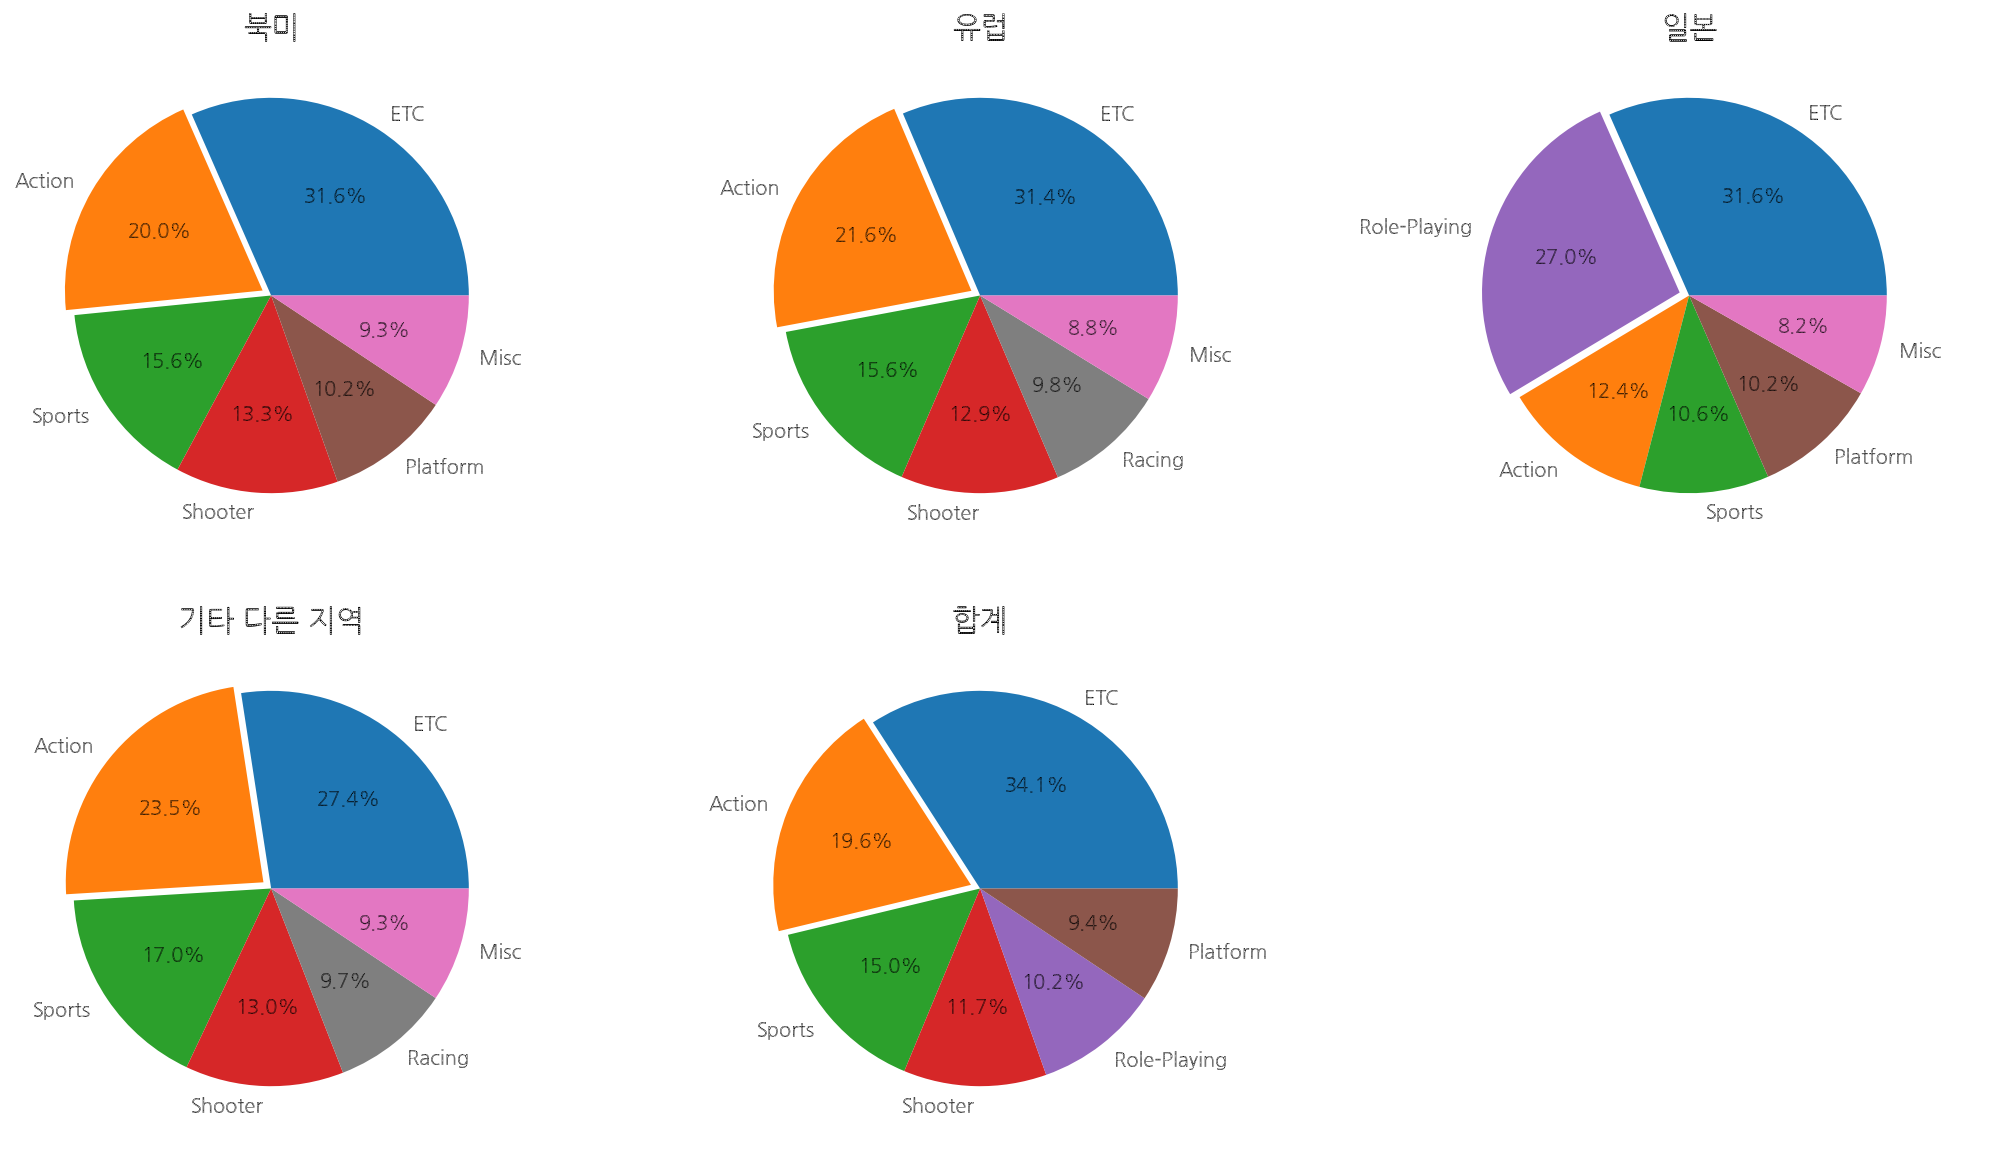

In [2]:
sales_by_genre = df[['Genre', *regions, 'Total_Sales']].groupby('Genre').sum()
# stats.chi2_contingency(sales_by_genre, correction=False)

def make_etc_bundle(region):
  sorted= sales_by_genre.reset_index()[[region, 'Genre']].sort_values(by=region, ascending=False)
  sorted['Genre'] = [ g if idx < 5 else 'ETC' for idx, g in enumerate(sorted['Genre'])]
  df = pd.DataFrame(sorted).groupby('Genre').sum()
  return df.sort_values(by=region, ascending=False)

na = make_etc_bundle('NA_Sales')
eu = make_etc_bundle('EU_Sales')
jp = make_etc_bundle('JP_Sales')
other = make_etc_bundle('Other_Sales')
total = make_etc_bundle('Total_Sales')

print("지역 마다 선호하는 장르가 다를까?")
print("지표: 각 지역의 장르별 매출액 ")
print("결론: 통계적 수치만 봤을 때는 지역마다 상이하지만, 전반적인 추세만 보면 일본을 제외하고 모두 비슷한 경향이 있다.\n")

colours = {'ETC': 'C0',
           'Action': 'C1',
           'Sports': 'C2',
           'Shooter': 'C3',
           'Role-Playing': 'C4',
           'Platform': 'C5',
           'Misc': 'C6',
           'Racing': 'C7'}
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].set_title('북미', fontsize=15)
axs[0, 0].pie(na['NA_Sales'],
              labels=na.index,
              autopct='%1.1f%%', 
              colors=[colours[key] for key in na.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[0, 1].set_title('유럽', fontsize=15)
axs[0, 1].pie(eu['EU_Sales'],
              labels=eu.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in eu.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[0, 2].set_title('일본', fontsize=15)
axs[0, 2].pie(jp['JP_Sales'],
              labels=jp.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in jp.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[1, 0].set_title('기타 다른 지역', fontsize=15)
axs[1, 0].pie(other['Other_Sales'],
              labels=other.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in other.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[1, 1].set_title('합계', fontsize=15)
axs[1, 1].pie(total['Total_Sales'],
              labels=total.index,
              autopct='%1.1f%%',
              colors=[colours[key] for key in total.index],
              explode=(0, 0.05, 0, 0, 0, 0))
axs[-1, -1].axis('off')
plt.show()

연도에 따른 게임 트렌드가 있을까?
지표: 각 연도에 출시된 장르별 게임 수
결론: 게임 시장이 커질수록 트렌드는 점점 명확하게 나타난다. 



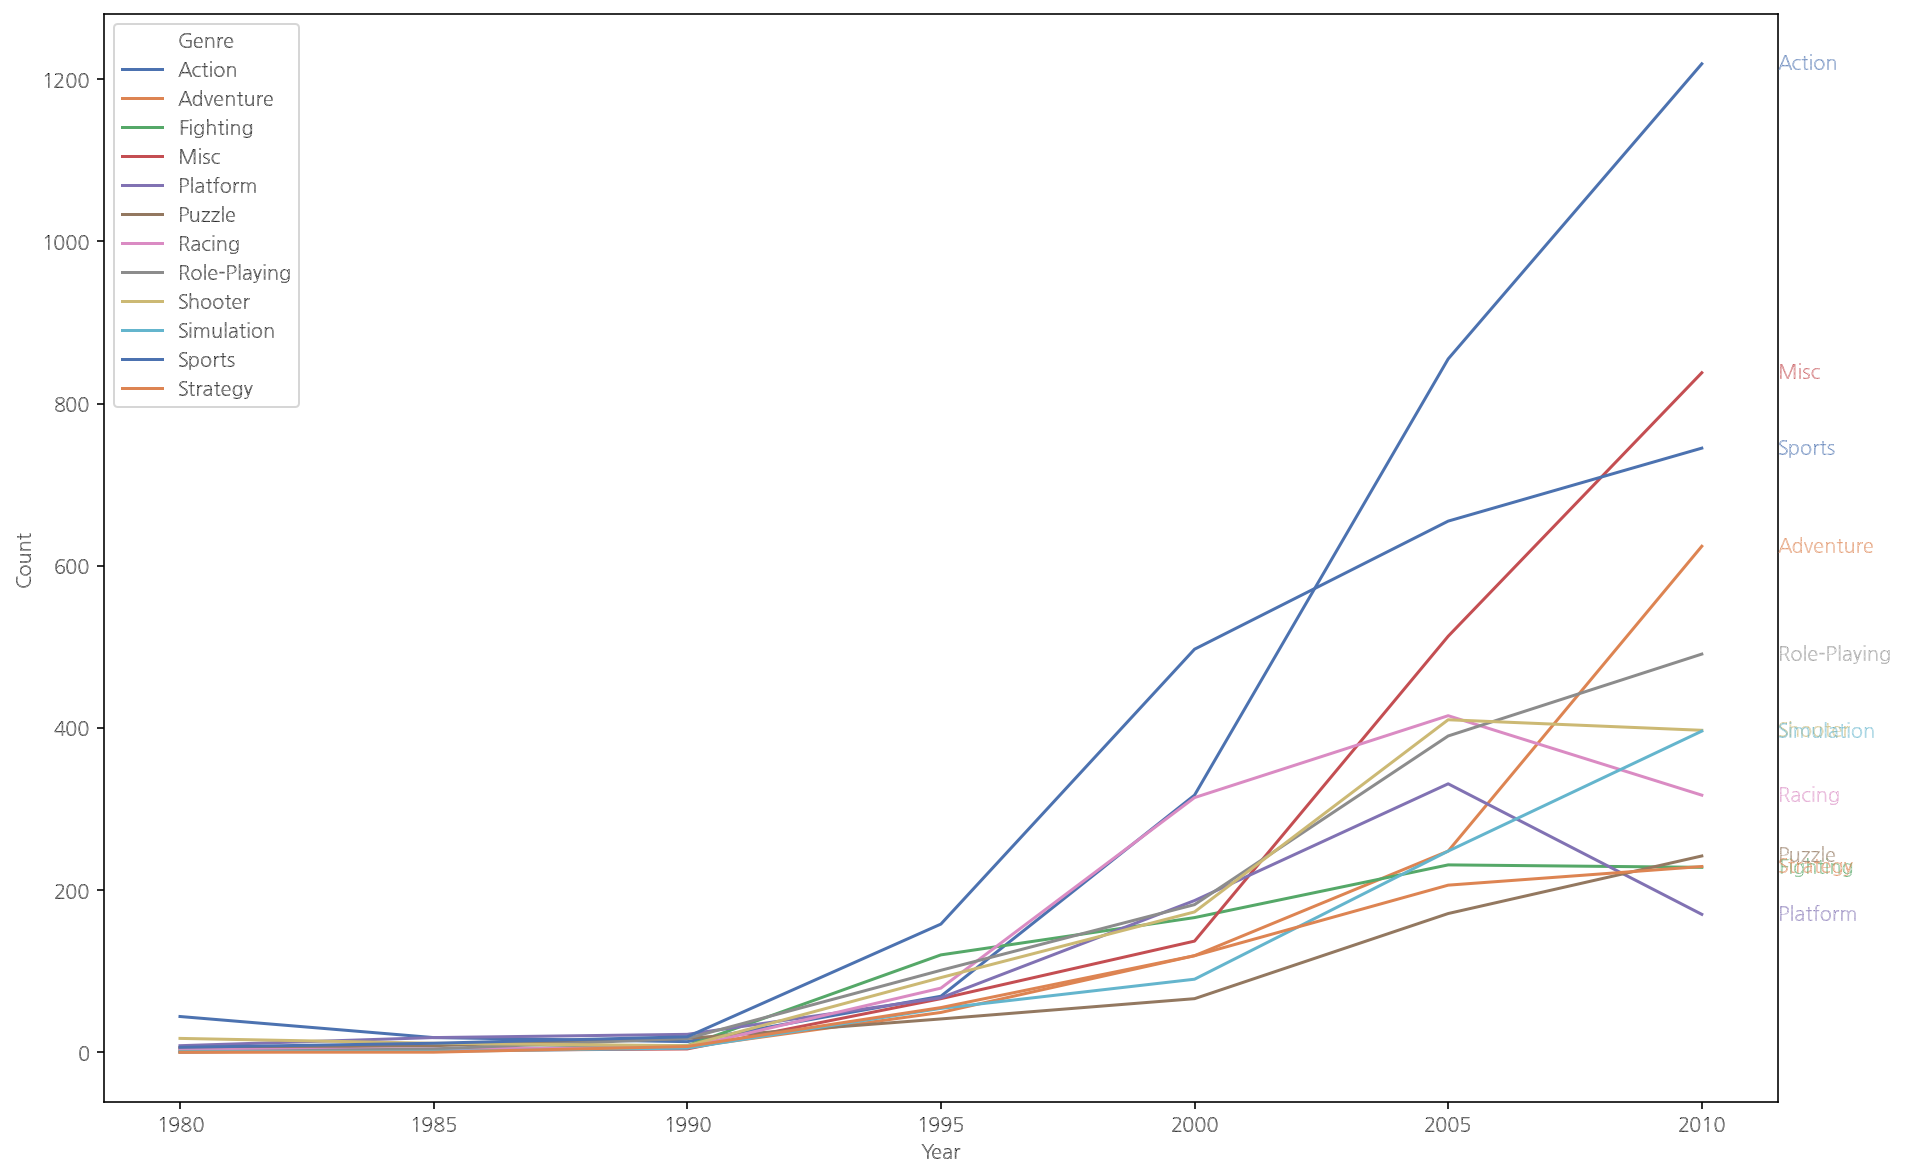

In [3]:
print('연도에 따른 게임 트렌드가 있을까?')
print('지표: 각 연도에 출시된 장르별 게임 수')
print('결론: 게임 시장이 커질수록 트렌드는 점점 명확하게 나타난다. \n')

df_trend = df[['Year', 'Genre']]
df_trend = df_trend[df_trend['Year'] != 0]
df_trend['Year'] = df_trend['Year'].apply(lambda x: 5 * round(x / 5))

cross_trend = df_trend.groupby(['Year', 'Genre']).size().unstack(1).fillna(0)
cross_trend = cross_trend[:-2]
# stats.chi2_contingency(cross_trend, correction=False)

tidy_trend = cross_trend.stack().reset_index().rename(columns={0:'Count'})
plt.figure(figsize=(15,10))
g = sns.lineplot(x='Year', y='Count', data=tidy_trend, hue='Genre', palette='deep')
for idx, l in enumerate(g.lines):
    y = l.get_ydata()
    if len(y) > 0:
      g.annotate(tidy_trend['Genre'][idx], xy=(1,y[-1]), xycoords=('axes fraction', 'data'), 
                    ha='left', va='center', color=l.get_color())

In [4]:
df_total_sales = df[['Name', 'Platform', 'Year', 'Genre', 'Total_Sales', 'Publisher']]
recent_sales = df_total_sales[(df['Year'] > 2015)].groupby(['Name', 'Year', 'Genre', 'Publisher']).sum().sort_values('Total_Sales', ascending=False).reset_index()
df_total_sales_grouped = df_total_sales.groupby(['Name', 'Year', 'Genre', 'Publisher']).sum().sort_values('Total_Sales', ascending=False).reset_index()
print('2015년 이후 출시 게임 장르별 누적매출 순위')
display(recent_sales[['Genre', 'Total_Sales']].groupby('Genre').sum().sort_values('Total_Sales', ascending=False).reset_index())
print('\n\n2015년 이후 출시 게임 누적매출 순위')
display(recent_sales[:30])

def get_prefix(name):
  return name.split(' ')[0]

2015년 이후 출시 게임 장르별 누적매출 순위


,Genre,Total_Sales
0,Action,19850.0
1,Shooter,18170.0
2,Sports,14630.0
3,Role-Playing,6790.0
4,Fighting,3850.0
5,Platform,2080.0
6,Adventure,1790.0
7,Racing,1670.0
8,Misc,1150.0
9,Simulation,680.0




2015년 이후 출시 게임 누적매출 순위


,Name,Year,Genre,Publisher,Total_Sales
0,FIFA 17,2016.0,Sports,Electronic Arts,6900.0
1,Tom Clancy's The Division,2016.0,Shooter,Ubisoft,5980.0
2,Uncharted 4: A Thief's End,2016.0,Shooter,Sony Computer Entertainment,4200.0
3,Far Cry: Primal,2016.0,Action,Ubisoft,3130.0
4,Overwatch,2016.0,Shooter,Activision,3010.0
5,LEGO Marvel's Avengers,2016.0,Action,Warner Bros. Interactive Entertainment,2260.0
6,Doom (2016),2016.0,Shooter,Bethesda Softworks,2240.0
7,Madden NFL 17,2016.0,Sports,Electronic Arts,2210.0
8,Dark Souls III,2016.0,Role-Playing,Namco Bandai Games,1960.0
9,NBA 2K17,2016.0,Sports,Take-Two Interactive,1940.0


(0.86, 0.65)

In [5]:
def game_series(name):
  name_year_sales = df[['Name', 'Year', 'Total_Sales']]
  print(name + ' 시리즈')
  display(name_year_sales[df['Name'].str.startswith(name)].groupby(['Name', 'Year']).sum().sort_values('Year', ascending=False).head().reset_index())
  print('\n\n')

for name in ['Tom Clancy', 'Uncharted', 'Far Cry', 'FIFA']:
  game_series(name)

Tom Clancy 시리즈


,Name,Year,Total_Sales
0,Tom Clancy's The Division,2016.0,5980.0
1,Tom Clancy's Rainbow Six: Siege,2015.0,3660.0
2,Tom Clancy's Splinter Cell: Blacklist,2013.0,2320.0
3,Tom Clancy's Ghost Recon: Future Soldier,2012.0,2600.0
4,Tom Clancy's Ghost Recon: Shadow Wars,2011.0,340.0





Uncharted 시리즈


,Name,Year,Total_Sales
0,Uncharted 4: A Thief's End,2016.0,4200.0
1,Uncharted: The Nathan Drake Collection,2015.0,4470.0
2,Uncharted 3: Drake's Deception,2011.0,6820.0
3,Uncharted: Golden Abyss,2011.0,1740.0
4,Uncharted 2: Among Thieves,2009.0,6730.0





Far Cry 시리즈


,Name,Year,Total_Sales
0,Far Cry: Primal,2016.0,3130.0
1,Far Cry 4,2014.0,8660.0
2,Far Cry 3,2012.0,7450.0
3,Far Cry 2,2008.0,3500.0
4,Far Cry Instincts Evolution,2006.0,80.0





FIFA 시리즈


,Name,Year,Total_Sales
0,FIFA 17,2016.0,6900.0
1,FIFA 16,2015.0,16430.0
2,FIFA 15,2014.0,19020.0
3,FIFA 14,2013.0,17160.0
4,FIFA Soccer 13,2012.0,16150.0


In [6]:
old_games = df_total_sales[(df['Year'] < 2000) & (df['Year'] >= 1990)].groupby(['Name', 'Year', 'Genre']).sum().sort_values('Total_Sales', ascending=False).reset_index()
print('FIFA 90년대 버전 누적 매출')
display(old_games[old_games['Name'].str.startswith('FIFA')])
print('\n\n90년대 게임 누적 매출')
old_games.head()

FIFA 90년대 버전 누적 매출


,Name,Year,Genre,Total_Sales
156,FIFA 2000,1998.0,Sports,1870.0
410,FIFA: Road to World Cup 98,1997.0,Sports,740.0
495,FIFA: Road to World Cup 98,1997.0,Sports,570.0
516,FIFA 99,1998.0,Sports,530.0
544,FIFA Soccer 64,1997.0,Sports,490.0
1069,FIFA Soccer 96,1995.0,Sports,160.0
1089,FIFA Soccer 97,1996.0,Sports,160.0




90년대 게임 누적 매출


,Name,Year,Genre,Total_Sales
0,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31380.0
1,Pokemon Gold/Pokemon Silver,1999.0,Role-Playing,23090.0
2,Super Mario World,1990.0,Platform,20620.0
3,Pokémon Yellow: Special Pikachu Edition,1998.0,Role-Playing,14640.0
4,Super Mario 64,1996.0,Platform,11900.0


In [9]:
check_series_arr = []

def is_series_game(row, df):
  name, publisher = row
  prefix = get_prefix(name)
  condition = (df['Name'].str.startswith(prefix)) & (df_total_sales_grouped['Publisher'] == publisher)
  check_series_arr.append(len(df[condition]) > 1)

recent_sales[['Name', 'Publisher']].apply(lambda x: is_series_game(x, df_total_sales_grouped), axis=1)

recent_series_all = len(list(filter(lambda x: x, check_series_arr)))
recent_series_10_percent_count = round(recent_series_all * 10/100)
recent_series_top_10_percent = len(list(filter(lambda x: x, check_series_arr[:recent_series_10_percent_count])))

# round(recent_series_top_10_percent / recent_series_10_percent_count, 2), round(recent_series_all / len(recent_sales), 2)

(0.86, 0.65)

# 최근 게임 중 시리즈 제작 비율: 65%
# 매출 상위 10% 시리즈 제작 비율: 86%


# 결론
- 일본 타겟팅이 아닌 이상 지역별 공략은 크게 의미 없다.
- 잘 나가는 게임 장르의 트렌드는 존재 한다! (Action, Sports, Shooting)
- 장기적 관점으로 시리즈를 기획하고 제작해야한다.